## Attack prediction.
## Requirement :Predict the chances of attack.

In [187]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [188]:
#loading the dataset
practice = pd.read_csv('C:\\Users\\welcome\\Desktop\\heart.csv')

## Inspecting the data frame.

In [189]:
#top 5 rows
practice.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [190]:
#bottom 5 rows
practice.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## Independent features:
age : Age of the patient.<br>
sex : Sex of the patient. (1:male, 0:female)<br>
cp  : Chest Pain. <br>
trtbps : blood pressure. <br>
chol : cholesterol.<br>
fbs : fasting blood sugar.<br>
rest_ecg : resting electrocardiographic results.<br>
thalach : maximum heart rate achieved.<br>
exang : exercise induced angina. (1 = yes; 0 = no).<br>
oldpeak : Previous peak.<br>
slp : Slope.<br>
caa :number of major vessels.(0-3).<br>
thall : Thal rate.<br>
## The Target variable is:<br>
output :<br>
0= less chance of heart attack. <br> 1= more chance of heart attack.

In [191]:
#Dimension 
practice.shape

(303, 14)

In [192]:
#information about dataframe
practice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [193]:
#statistical details 
practice.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Minimum age = 29, maximum age = 77.<br> 
25% of the people in our dataset have age < 47. <br>
75% of the people in our dataset have age < 61. <br>

In [194]:
#missing values check
practice.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [195]:
#unique values check
practice.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

## Visualization.

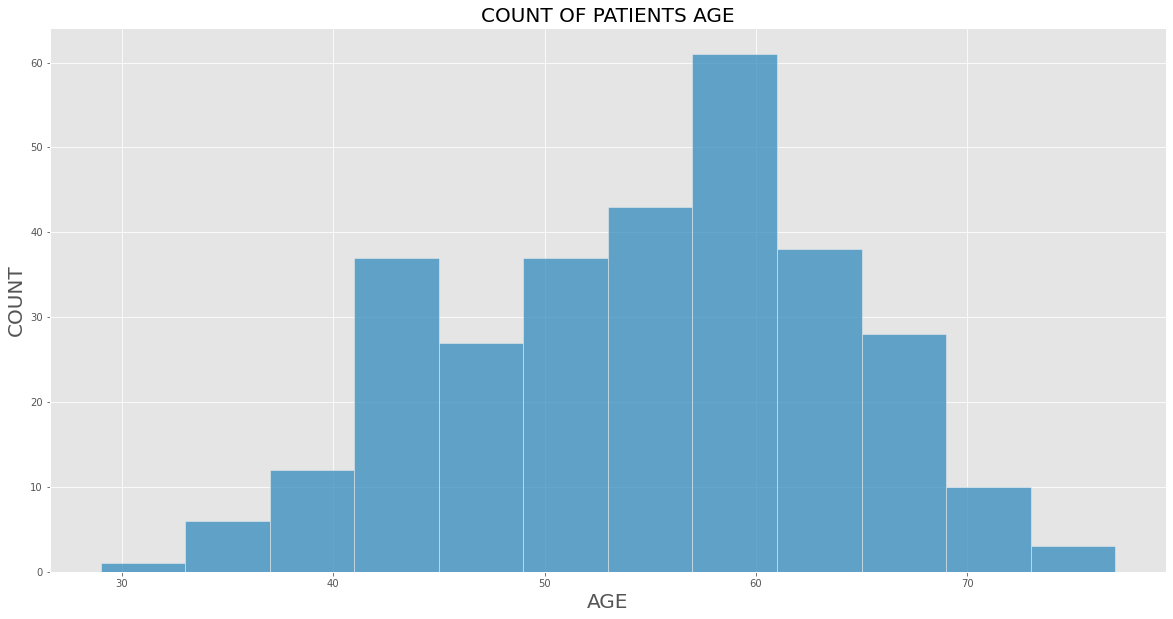

In [196]:
# visualization for the age feature.
plot = plt.figure(figsize=(20,10))
sns.histplot(x= 'age', data = practice)  #using histtplot
plt.title("COUNT OF PATIENTS AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

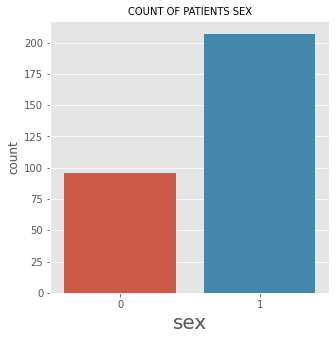

In [197]:
# visualization for the sex feature.
plot = plt.figure(figsize=(5,5))
sns.countplot(x='sex', data =  practice) #using countplot
plt.title("COUNT OF PATIENTS SEX",fontsize=10)
plt.xlabel("sex",fontsize=20)
plt.show()

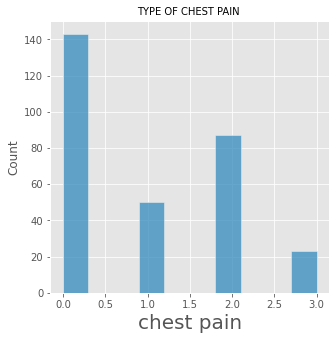

In [198]:
# visualization for the CHEST PAIN feature.
plot = plt.figure(figsize=(5,5))
sns.histplot(x = "cp", data = practice ) #using countplot
plt.title("TYPE OF CHEST PAIN ",fontsize=10)
plt.xlabel("chest pain",fontsize=20)
plt.show()

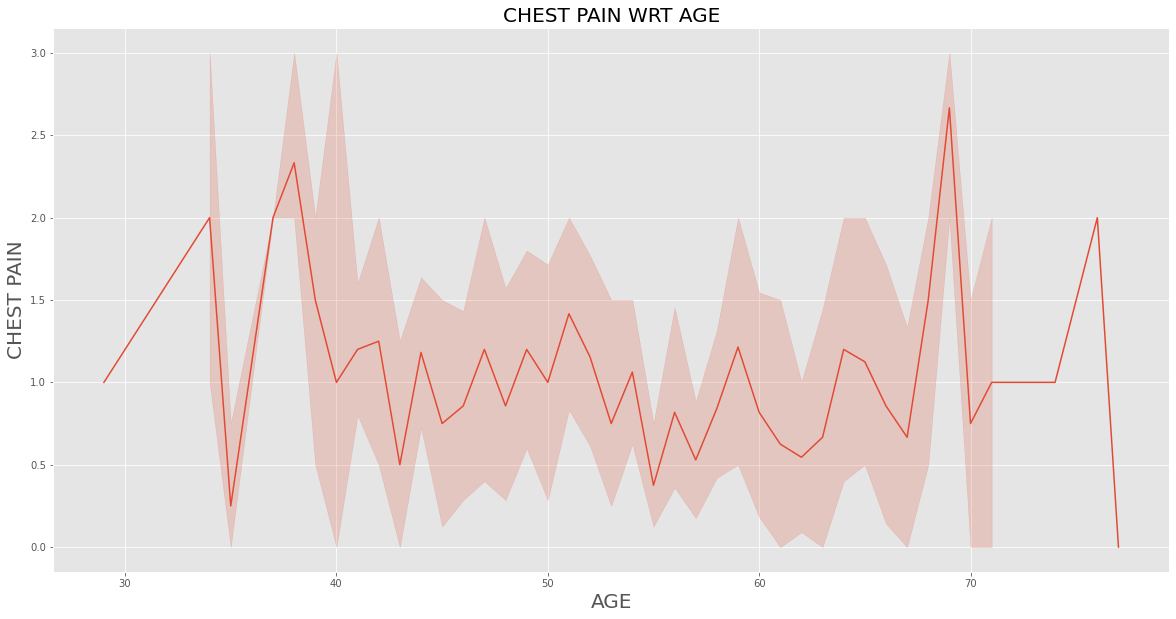

In [199]:
# CHEST PAIN WRT AGE
plot = plt.figure(figsize=(20,10))
sns.lineplot(y="cp",x="age",data= practice)
plt.title("CHEST PAIN WRT AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("CHEST PAIN",fontsize=20)
plt.show()

<Figure size 1440x720 with 0 Axes>

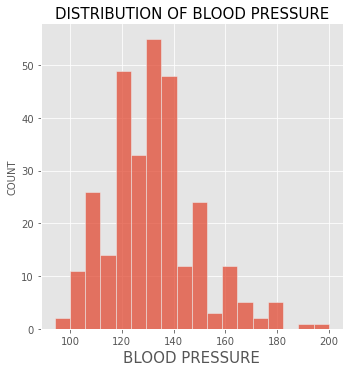

In [200]:
# visualization for the trtbps feature.
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(practice["trtbps"])   #using displot here
plt.title("DISTRIBUTION OF BLOOD PRESSURE",fontsize=15)
plt.xlabel("BLOOD PRESSURE",fontsize=15)
plt.ylabel("COUNT",fontsize=10)
plt.show()

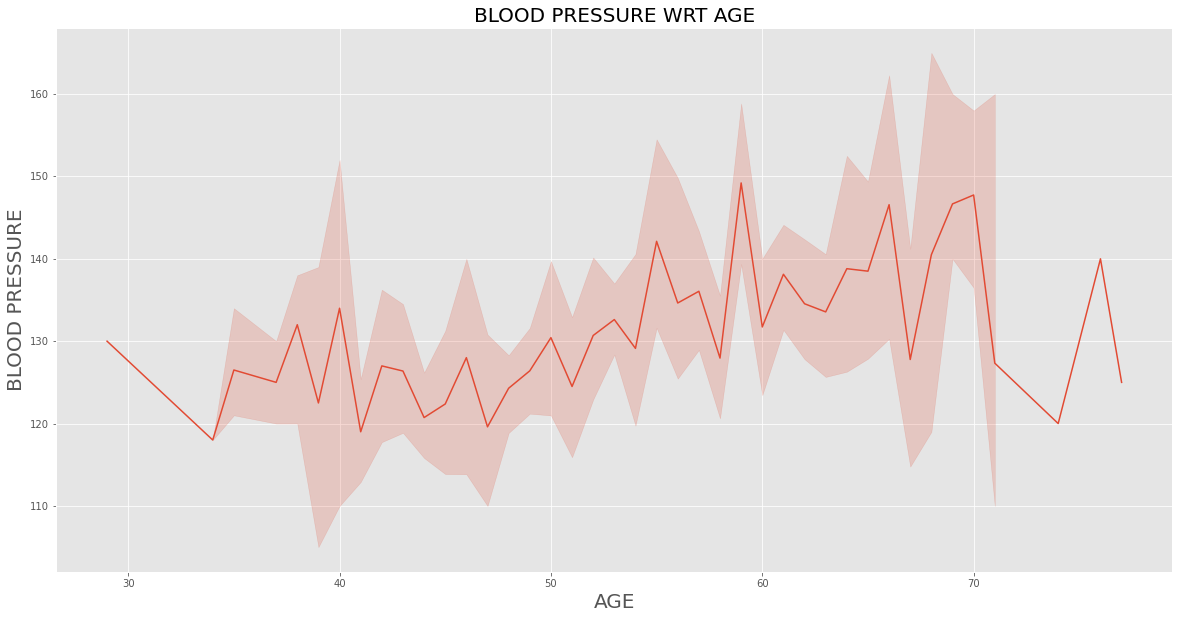

In [201]:
# BLOOD PRESSURE WRT AGE
plot = plt.figure(figsize=(20,10))
sns.lineplot(y="trtbps",x="age",data= practice)
plt.title("BLOOD PRESSURE WRT AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("BLOOD PRESSURE",fontsize=20)
plt.show()

<Figure size 1440x720 with 0 Axes>

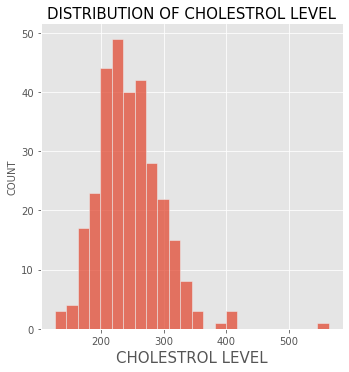

In [202]:
# visualization for the chol feature.
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(practice["chol"])   #using displot here
plt.title("DISTRIBUTION OF CHOLESTROL LEVEL",fontsize=15)
plt.xlabel("CHOLESTROL LEVEL",fontsize=15)
plt.ylabel("COUNT",fontsize=10)
plt.show()

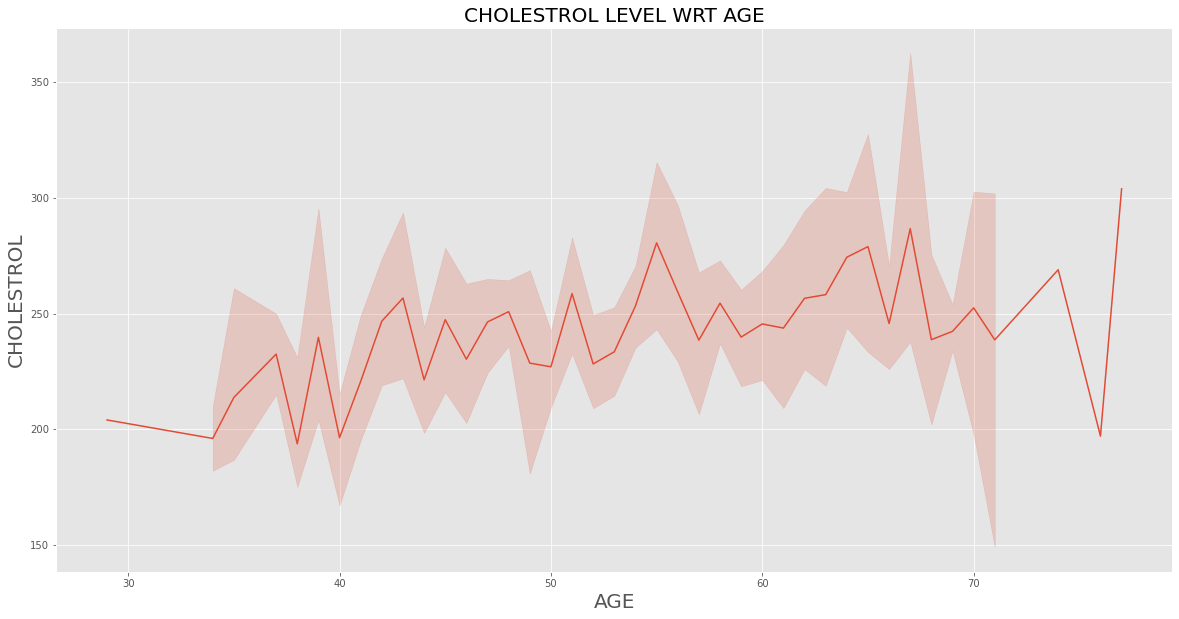

In [203]:
# CHOLESTROL LEVEL WRT AGE
plot = plt.figure(figsize=(20,10))
sns.lineplot(y="chol",x="age",data= practice)
plt.title("CHOLESTROL LEVEL WRT AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("CHOLESTROL",fontsize=20)
plt.show()

<Figure size 1440x720 with 0 Axes>

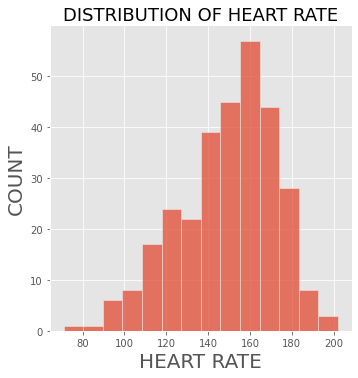

In [204]:
# visualization for the HEART RATE feature.
plt.figure(figsize=(20,10))
sns.displot(practice["thalachh"])
plt.title("DISTRIBUTION OF HEART RATE",fontsize=18)
plt.xlabel("HEART RATE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

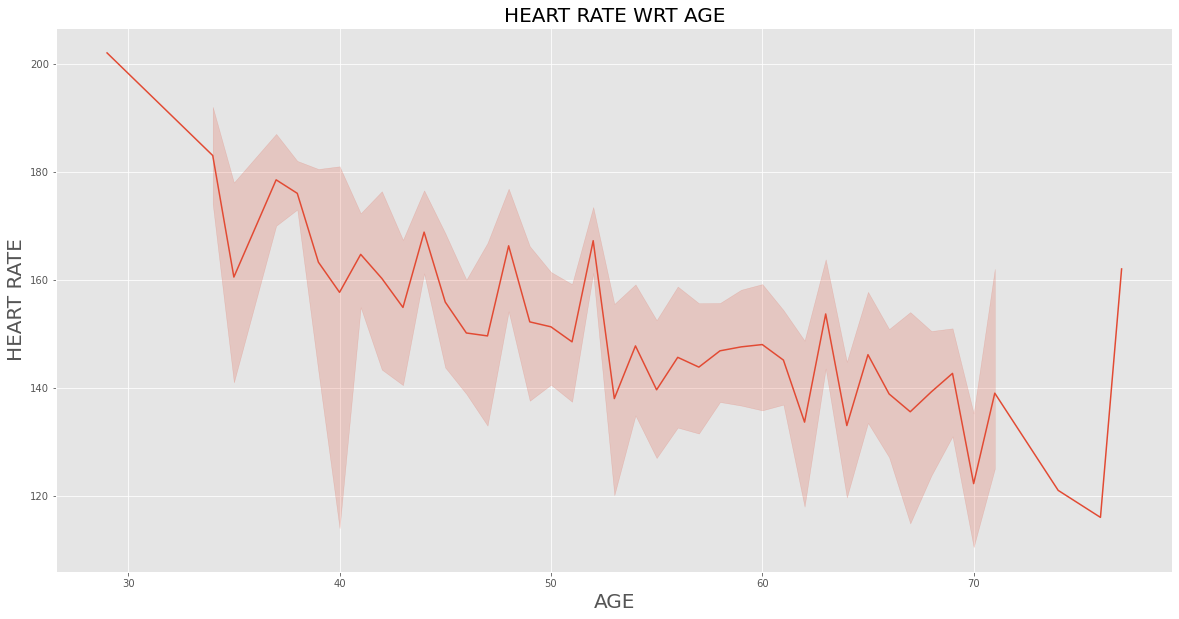

In [205]:
# HEART RATE WRT AGE
plot = plt.figure(figsize=(20,10))
sns.lineplot(y="thalachh",x="age",data= practice)
plt.title("HEART RATE WRT AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("HEART RATE",fontsize=20)
plt.show()

In [320]:
practice.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [321]:
group = practice.groupby(['sex'])['output'].value_counts()
group 

sex  output
0    1          72
     0          24
1    0         114
     1          93
Name: output, dtype: int64

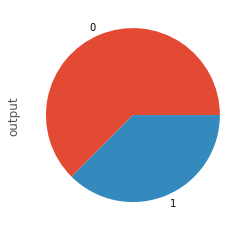

In [207]:
#plotting which gender is leading in heart attack.
group = practice.groupby(['sex'])['output'].mean().plot.pie()

In [322]:
group1= practice.groupby(['cp'])['output'].value_counts()
group1

cp  output
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: output, dtype: int64

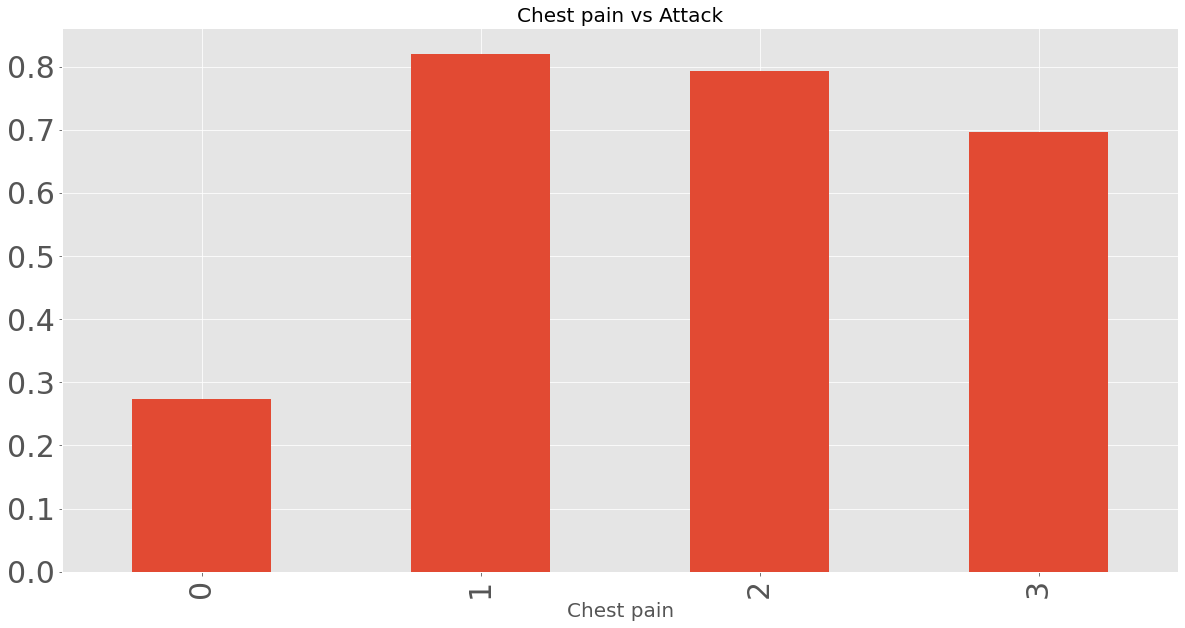

In [209]:
#plotting which type of chest pain is more dangerous for attack.
group1.plot.bar(figsize=(20,10), fontsize=30)
plt.title("Chest pain vs Attack",fontsize=20)
plt.xlabel("Chest pain",fontsize=20)
plt.show()

In [210]:
# sugar is high for gender 0.
group2 = practice.groupby(['fbs'])['output'].mean()
group2

fbs
0    0.550388
1    0.511111
Name: output, dtype: float64

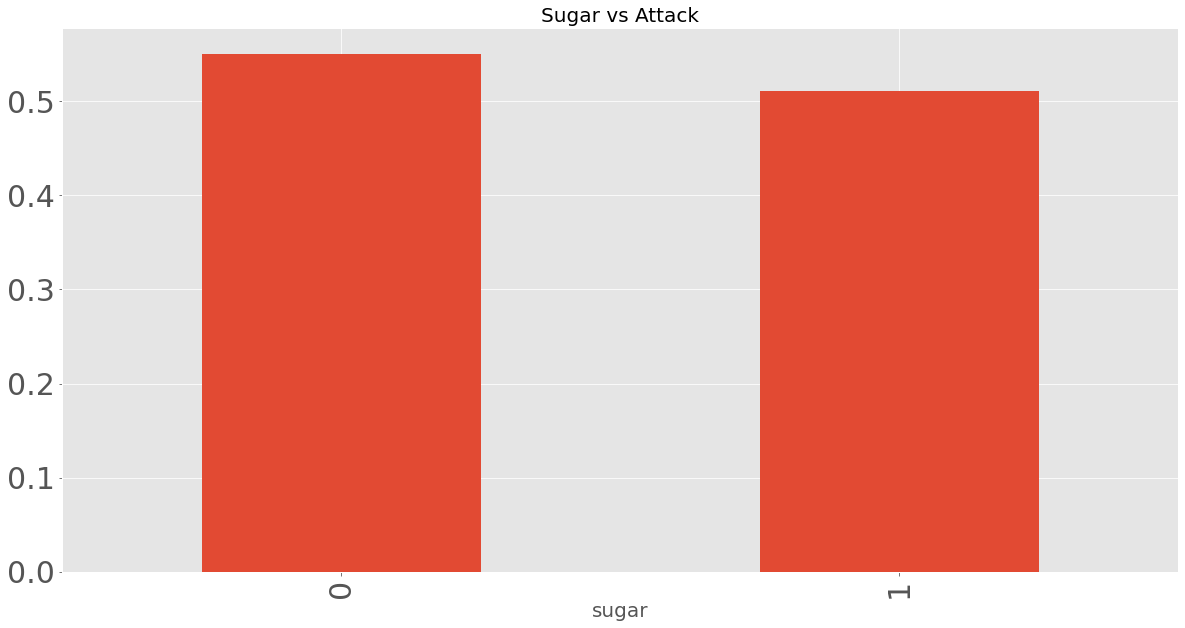

In [211]:
group2.plot.bar(figsize=(20,10), fontsize=30)
plt.title("Sugar vs Attack",fontsize=20)
plt.xlabel("sugar",fontsize=20)
plt.show()

In [212]:
group3 = practice.groupby(['exng'])['output'].mean()
group3
# exercised patients were dead more.

exng
0    0.696078
1    0.232323
Name: output, dtype: float64

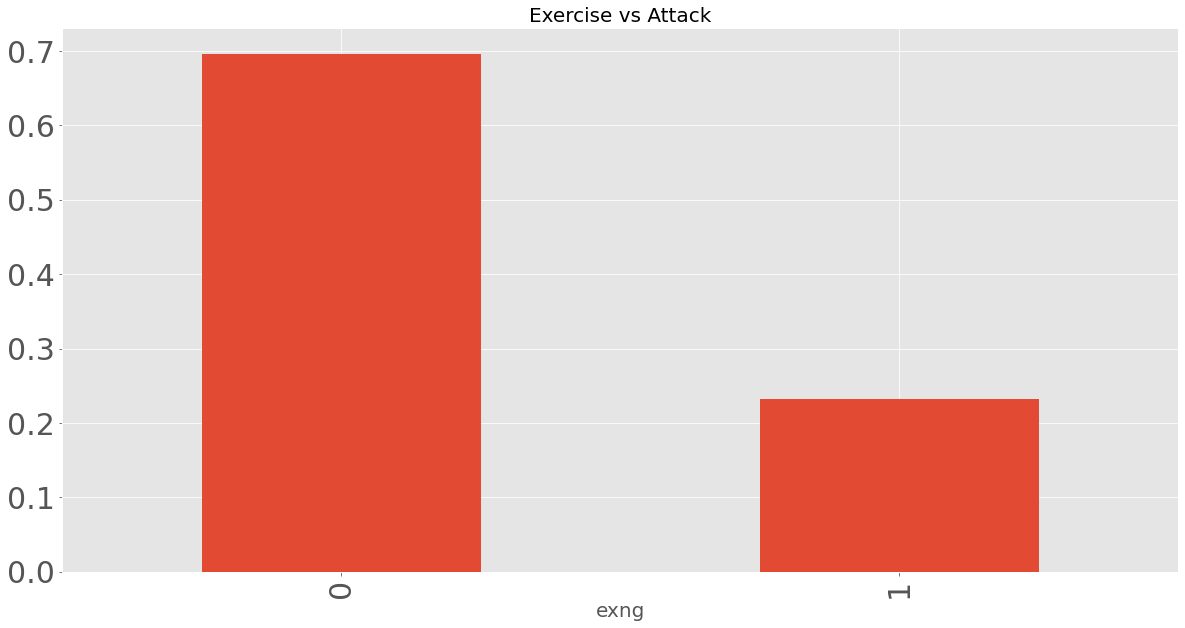

In [213]:
group3.plot.bar(figsize=(20,10), fontsize=30)
plt.title("Exercise vs Attack",fontsize=20)
plt.xlabel("exng",fontsize=20)
plt.show()

## Feature Scaling

In [214]:
from sklearn.preprocessing import StandardScaler

In [215]:
# instantiating
mms = StandardScaler()

In [216]:
list = ['age','trtbps','chol','thalachh','oldpeak']
practice[list] = mms.fit_transform(practice[list])

In [217]:
practice.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
5,0.290464,1,0,0.478391,-1.048678,0,1,-0.072018,0,-0.551783,1,0,1,1
6,0.180175,0,1,0.478391,0.922521,0,0,0.146634,0,0.224643,1,0,2,1
7,-1.143291,1,1,-0.663867,0.323431,0,1,1.021244,0,-0.896862,2,0,3,1
8,-0.260980,1,2,2.306004,-0.913400,1,1,0.540209,0,-0.465514,2,0,3,1
9,0.290464,1,2,1.049520,-1.512490,0,1,1.064975,0,0.483451,2,0,2,1


## Looking at Correlations

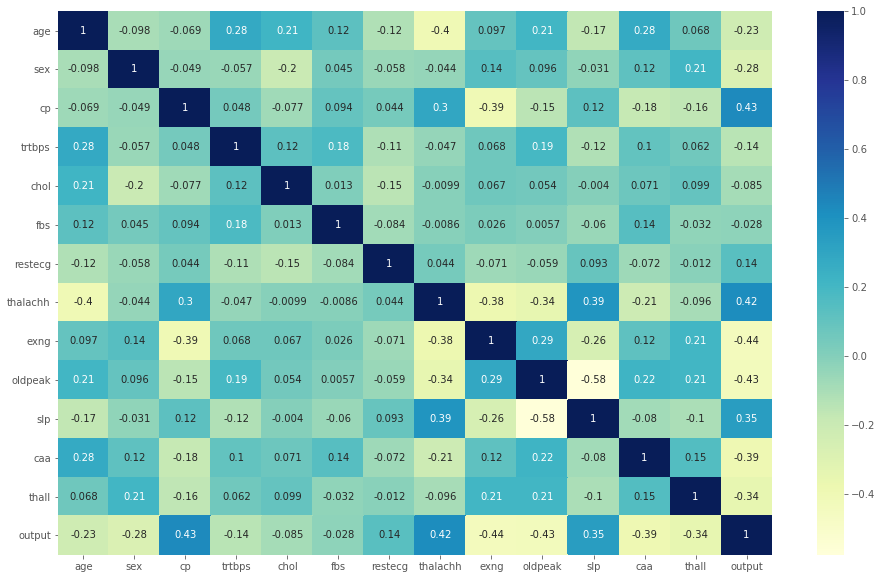

In [218]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(practice.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Dividing dataset into X and Y

In [219]:
x = practice.drop(['output'], axis = 1)
y =  practice.output

In [220]:
y.shape

(303,)

In [221]:
x.shape

(303, 13)

## Train-Test Split

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
# Splitting the data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(x,y, train_size = 0.70,  random_state=100)

In [224]:
X_train.shape

(212, 13)

In [225]:
X_test.shape


(91, 13)

In [226]:
Y_train.shape

(212,)

In [227]:
Y_test.shape

(91,)

##  Using logistic Regression

In [228]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [229]:
# Fitting Logistic Regression to the training set   
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, Y_train) 

LogisticRegression(random_state=0)

### Making predictions on the train set

In [230]:
pred = classifier.predict(X_train)

In [231]:
score = accuracy_score(Y_train,pred)
score  # printing the overall accuracy

0.8679245283018868

### Making predictions on the test set

In [232]:
#Predicting the test set result  
pred_test = classifier.predict(X_test)  

In [233]:
pred_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [234]:
#dataframe with the output and the prediction.
y_test_pred = pd.DataFrame({'output':Y_test.values, 'predicted':pred_test})
y_test_pred.reset_index(drop=True, inplace=True)

In [235]:
y_test_pred.head(10)

,output,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,1,0
7,0,0
8,1,1
9,0,1


In [317]:
score_accuracy = accuracy_score(Y_test,pred_test)
score_accuracy* 100 # printing the overall accuracy

85.71428571428571

## Using Decision Tree

In [237]:
from sklearn.tree import DecisionTreeClassifier

In [238]:
dtc = DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=42)

In [239]:
# fitting the dataset with dtc

dtc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

### Making predictions on the train set

In [240]:
predi = dtc.predict(X_train)

In [241]:
score = accuracy_score(Y_train,predi)

In [242]:
score # printing the overall accuracy

0.8584905660377359

### Making predictions on the test set

In [243]:
pr = dtc.predict(X_test)

In [244]:
pr

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1], dtype=int64)

In [245]:
#dataframe with the actual and the predicted values
test_pred_fin = pd.DataFrame({'Actual':Y_test.values, 'predicted':pr})
test_pred_fin.reset_index(drop=True, inplace=True)

In [246]:
test_pred_fin.head(10)

,Actual,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,1,0
7,0,0
8,1,1
9,0,0


In [247]:
sco = accuracy_score(Y_test,pr)

In [318]:
sco* 100 # printing the overall accuracy

81.31868131868131

## Using Support Vector Machine (SVM)

In [249]:
from sklearn.svm import SVC

In [250]:
#x_x = practice.drop(['output'], axis = 1)
#y_y =  practice.output

In [251]:
# Splitting the data into train and test. 
#z_train,z_test,a_train,a_test = train_test_split(x_x,y_y, train_size = 0.75,  random_state=100)

In [252]:
#from sklearn.svm import SVC # "Support vector classifier"  
clas = SVC(kernel='linear', random_state=0)  
# fitting the dataset with classifier
clas.fit(X_train, Y_train)  

SVC(kernel='linear', random_state=0)

### Making predictions on the test set

In [253]:
y_pre = classifier.predict(X_test)

In [254]:
#dataframe with the actual and the predicted values
tes = pd.DataFrame({'Actual':Y_test.values, 'predicted':y_pre})
tes.reset_index(drop=True, inplace=True)

In [255]:
tes.head(10)

,Actual,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,1,0
7,0,0
8,1,1
9,0,1


In [316]:
sv = accuracy_score(Y_test,y_pre)
sv* 100 # printing the overall accuracy

85.71428571428571

## Using Random Forest 

In [257]:
from sklearn.ensemble import RandomForestClassifier  

In [258]:
# Splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.70,  random_state=100)

In [259]:
classif= RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42) 
#n_estimators= 10, criterion="entropy"
#n_estimators=300,min_samples_leaf=0.16, random_state=42
# n_estimators= The required number of trees in the Random Forest. The default value is 10.
# criterion= It is a function to analyze the accuracy of the split. Here I have taken "entropy" for the information gain.

In [260]:
#Fitting RandomForestClassifier to the training set  
classif.fit(x_train, y_train) 

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

### Making predictions on the test set

In [261]:
p = classif.predict(x_test)

In [262]:
p

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [263]:
#dataframe with the actual and the predicted values
test = pd.DataFrame({'Actual':y_test.values, 'predicted':p})
test.reset_index(drop=True, inplace=True)

In [264]:
test.head(10)

,Actual,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,1,0
7,0,0
8,1,1
9,0,1


In [315]:
sc = accuracy_score(y_test,p)
sc* 100 # printing the overall accuracy

84.61538461538461

##  Using XG Boost 

In [266]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\welcome\anaconda3\python.exe -m pip install --upgrade pip' command.


In [267]:
from xgboost import XGBClassifier

In [268]:
boost = XGBClassifier()
# GradientBoostingClassifier

In [269]:
# fitting with the training data
boost.fit(x_train, y_train)
# Model Training:

[17:12:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Making predictions on the test set

In [270]:
boost_pred = boost.predict(x_test)

In [271]:
#dataframe with the actual and the predicted values
t = pd.DataFrame({'Act':y_test.values, 'pre':boost_pred})
t.reset_index(drop=True, inplace=True)

In [272]:
t.head(10)

,Act,pre
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,1,0
7,0,0
8,1,1
9,0,1


In [314]:
acc = accuracy_score(y_test,boost_pred) # printing the overall accuracy
acc* 100

79.12087912087912

##  Using  KNN classifier 

In [274]:
from sklearn.neighbors import KNeighborsClassifier

In [275]:
#Fitting K-NN classifier to the training set   
c = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
c.fit(x_train, y_train) 

KNeighborsClassifier()

### Making predictions on the train set

In [276]:
#Predicting the train set result  
y_= c.predict(x_train) 

In [277]:
score = accuracy_score(y_train,y_)

In [278]:
score # printing the overall accuracy

0.8537735849056604

### Making predictions on the test set

In [279]:
#Predicting the test set result  
y_pr= c.predict(x_test) 

In [280]:
y_pr

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0], dtype=int64)

In [281]:
#dataframe with the actual and the predicted values
fin = pd.DataFrame({'A':y_test.values, 'P':y_pr})
fin.reset_index(drop=True, inplace=True)

In [282]:
fin.head(15)

,A,P
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,1,0
7,0,0
8,1,1
9,0,1


In [312]:
scre = accuracy_score(y_test, y_pr)

In [313]:
scre* 100 # printing the overall accuracy

82.41758241758241

## Using  Naïve Bayes 

In [286]:
from sklearn.naive_bayes import GaussianNB  

In [287]:
clasfir = GaussianNB()  

In [288]:
# Fitting Naive Bayes to the Training set  
# training the NB model and making predictions
clasfir.fit(x_train, y_train) # fit

GaussianNB()

### Making predictions on the train set

In [289]:
pi = clasfir.predict(x_train) # predict class

In [290]:
pi

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [291]:
sre = accuracy_score(y_train,pi) 

In [292]:
sre # printing the overall accuracy

0.8066037735849056

### Making predictions on the test set

In [293]:
# Predicting the Test set results  
y_ed = clasfir.predict(x_test)  

In [294]:
y_ed

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [295]:
#dataframe with the actual and the predicted values
fi = pd.DataFrame({'Ac':y_test.values, 'Pr':y_ed})
fi.reset_index(drop=True, inplace=True)

In [296]:
fi.head(10)

,Ac,Pr
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,1,0
7,0,0
8,1,1
9,0,1


In [297]:
sc_or = accuracy_score(y_test, y_ed) 

In [308]:
sc_or* 100  # printing the overall accuracy

87.91208791208791

##  Using AdaBoost Classifier

In [327]:
from sklearn.ensemble import AdaBoostClassifier

In [328]:
model_ada = AdaBoostClassifier(random_state=42)

In [329]:
model_ada.fit(x_train, y_train) #Fitting AdaBoost classifier to the training set  

AdaBoostClassifier(random_state=42)

### Making predictions on the test set

In [330]:
# Making Prediction
pred_ada = model_ada.predict(x_test)

In [332]:
pred_ada

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0], dtype=int64)

In [336]:
#dataframe with the actual and the predicted values
fo = pd.DataFrame({'Acc':y_test.values, 'Pre':pred_ada})
fo.reset_index(drop=True, inplace=True)

In [337]:
fo.head(10)

,Acc,Pre
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,1,0
7,0,0
8,1,1
9,0,1


In [339]:
# Calculating Accuracy Score
ada = accuracy_score(y_test, pred_ada)
ada* 100 # printing the overall accuracy

81.31868131868131

In [305]:

##  Using logistic Regression    - 85.7
##  Using Decision Tree          - 81.3
##  Using Random Forest          - 84.6
##  Using Support Vector Machine - 85.7
##  Using XG Boost               - 79.0
##  Using  KNN classifier        - 82.4
##  Using  Naïve Bayes           - 87.9
##  Using AdaBoost               - 81.3

## Naïve Bayes has the best accuracy score,and performing well.

